In [98]:
X = pd.read_csv('C:/Users/kotsi/Desktop/x_train.csv',delimiter=';')
Y = pd.read_csv('C:/Users/kotsi/Desktop/y_train.csv',delimiter=';',header=None)
Y.columns=['Exit']
Y=Y['Exit']

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 
from sklearn.model_selection import learning_curve, validation_curve, StratifiedKFold
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [100]:
X1=X[['averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels', 'numberOfDaysActuallyPlayed']]

In [101]:
Data=pd.concat([Y,X1],ignore_index=False,axis=1)
Data.head()

,Exit,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfDaysActuallyPlayed
0,0,24.444444,1,2
1,1,17.045455,1,4
2,1,8.400000,0,1
3,1,19.000000,0,1
4,0,9.600000,0,1


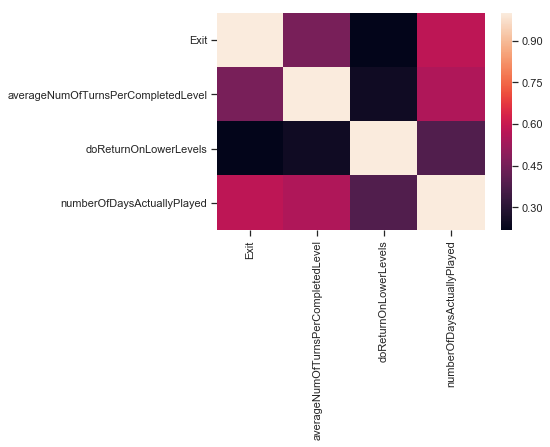

In [102]:
sns.heatmap(Data.corr())

In [103]:
print(Data.corr()['Exit'].abs().sort_values(ascending=False).head(10))

Exit                                  1.000000
numberOfDaysActuallyPlayed            0.580986
averageNumOfTurnsPerCompletedLevel    0.456771
doReturnOnLowerLevels                 0.216669
Name: Exit, dtype: float64


In [104]:
from sklearn import preprocessing
#X1 = preprocessing.normalize(X1) #X from 0 to 1
X1 = preprocessing.scale(X1) #mean 0, dispersion 1

C:\Users\kotsi\Anaconda37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
X1.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state = 11)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import SVC, LinearSVC 
from sklearn.naive_bayes import GaussianNB #+ MultinomialNB
from sklearn.kernel_approximation import RBFSampler
#from sklearn.tree import DecisionTreeClassifier

In [107]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr)
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.accuracy_score(y_test, y_test_predict))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3625
           1       0.72      0.53      0.61      1433

   micro avg       0.81      0.81      0.81      5058
   macro avg       0.78      0.73      0.74      5058
weighted avg       0.80      0.81      0.80      5058

[[3331  294]
 [ 668  765]]
0.8098062475286675


In [108]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=DataConversionWarning)

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_cv=GridSearchCV(lr,grid,cv=10)
log_cv.fit(X_train,y_train)

print("best parameters ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

best parameters  {'C': 0.01, 'penalty': 'l1'}
accuracy : 0.8173100687064406


In [109]:
log = LogisticRegression(C=0.01, penalty='l1')
log.fit(X_train, y_train)
y_train_predict = log.predict(X_train)
y_test_predict = log.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_predict))

0.8084223013048636
